## 결정트리(Decision Tree)
---
- 직관적이고 쉬운 모델 방식
- 스무고개 퀴즈 형식
- 과적합의 발생으로 다른 모델 대비 성능이 좋지 않은 모델
- 단독으로 사용되는 경우보다 여러개의 DT가 모여서 사용됨 ==> 앙상블

In [321]:
# 모듈 로딩 ----------------------------------------
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree  # 트리 시각화 함수
import pandas as pd

### [1] 데이터 로딩
---

In [322]:
# numpy => DataFrame형태로 데이터 로딩
# return_X_y=True, as_frame=True
dataX, datay = load_breast_cancer(return_X_y=True, as_frame=True)

# Bunch 타입 => Key로 data, target, target_names, feature_names...
# dataX, datay = load_breast_cancer)

In [323]:
dataX.info(), dataX.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

(None,
 Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error', 'fractal dimension error',
        'worst radius', 'worst texture', 'worst perimeter', 'worst area',
        'worst smoothness', 'worst compactness', 'worst concavity',
        'worst concave points', 'worst symmetry', 'worst fractal dimension'],
       dtype='object'))

In [324]:
f_names = dataX.columns

In [325]:
dataX.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

### [2] 학습 & 테스트 데이터 분리

In [326]:
type(dataX.values), type(datay.values)

(numpy.ndarray, numpy.ndarray)

In [327]:
# dataX = dataX.to_numpy()

In [328]:
# datay = datay.to_numpy()

In [329]:
# train : test = 75:25 <- test_size로 조절 하면 됨
# stratify=라벨 즉 타겟 데이터 지정 : 학습&테스트 데이터에도 비율 맞추기
train_X, test_X, train_y, test_y = train_test_split(dataX, 
                                                    datay,
#                                                     shuffle=False,  # stratify 랑 같이 못 씀???
                                                    stratify=datay,
                                                    random_state=42)

In [330]:
print(f'train_X : {train_X.shape}, test_X : {test_X.shape}')

train_X : (426, 30), test_X : (143, 30)


### [3] 학습
---
- DecisionTreeClassifier 학습 방법

In [331]:
# 모델 객체 생성
dtModel = DecisionTreeClassifier()

In [332]:
# 학습용 데이터로 학습 진행
dtModel.fit(train_X.values, train_y.values)
# values 안주면 predict에서 warning 뜸

DecisionTreeClassifier()

### [4] 평가

In [333]:
train_score=dtModel.score(train_X.values, train_y.values)
test_score=dtModel.score(test_X.values, test_y.values)
# 여기도 values 주면 됨

In [334]:
test_X.iloc[0]

mean radius                 12.750000
mean texture                16.700000
mean perimeter              82.510000
mean area                  493.800000
mean smoothness              0.112500
mean compactness             0.111700
mean concavity               0.038800
mean concave points          0.029950
mean symmetry                0.212000
mean fractal dimension       0.066230
radius error                 0.383400
texture error                1.003000
perimeter error              2.495000
area error                  28.620000
smoothness error             0.007509
compactness error            0.015610
concavity error              0.019770
concave points error         0.009199
symmetry error               0.018050
fractal dimension error      0.003629
worst radius                14.450000
worst texture               21.740000
worst perimeter             93.630000
worst area                 624.100000
worst smoothness             0.147500
worst compactness            0.197900
worst concav

In [335]:
print(f'train_score : {train_score} - test_score : {test_score}')

train_score : 1.0 - test_score : 0.9230769230769231


In [336]:
dtModel.predict([test_X.iloc[0]])

array([1])

### DTree 시각화
---
- plot_tree()

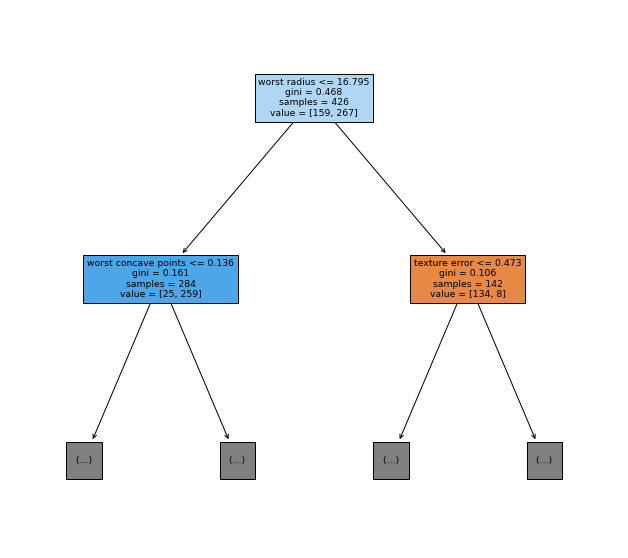

In [337]:
import matplotlib.pyplot as plt

plt.figure(figsize = (11, 10))
# plot_tree(dtModel)
plot_tree(dtModel, max_depth=1, filled=True, feature_names=f_names)
plt.savefig('tree.png')  # 현재 figure에 있는 그래프 파일로 저장
plt.show()

### 모델 속성 확인
---
- DT에서 속성들 중에서 속성도 중요도를 감지 가능
- Feature별로 특성들의 중요도 값
- 모든 값 합치면 1

In [338]:
dtModel.feature_importances_.max(), dtModel.feature_importances_.argmax(), f_names[22]

(0.6954632181471273, 20, 'worst perimeter')

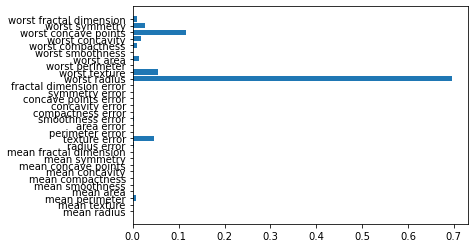

In [339]:
plt.barh(y=f_names, width=dtModel.feature_importances_)
plt.show()

# 

### RandomForest 학습 모델
---
- 100개 DecisionTree 모델
- 중복허용된 랜덤샘플 데이터 + DecisionTree 모델

In [340]:
from sklearn.ensemble import RandomForestClassifier

In [341]:
# oob_score_ : 중복허용랜덤샘플에 포함되지 않은 데이터 => 검증용으로 사용
forestModel = RandomForestClassifier(max_depth=5,
                                     oob_score=True)

In [342]:
forestModel.fit(train_X, train_y)

RandomForestClassifier(max_depth=5, oob_score=True)

In [343]:
# 모델 학습 후 속성 -----------------------
print(f'classes_ : {forestModel.classes_}')

classes_ : [0 1]


In [344]:
print(f'base_estimator_ : {forestModel.base_estimator_}')

base_estimator_ : DecisionTreeClassifier()


In [345]:
print(f'estimators_ : {forestModel.estimators_}')

estimators_ : [DecisionTreeClassifier(max_depth=5, max_features='auto',
                       random_state=1283151195), DecisionTreeClassifier(max_depth=5, max_features='auto',
                       random_state=1488805138), DecisionTreeClassifier(max_depth=5, max_features='auto',
                       random_state=1605745690), DecisionTreeClassifier(max_depth=5, max_features='auto',
                       random_state=1941805269), DecisionTreeClassifier(max_depth=5, max_features='auto',
                       random_state=1100125852), DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=713426899), DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=108694200), DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=983831195), DecisionTreeClassifier(max_depth=5, max_features='auto',
                       random_state=1461376464), DecisionTreeClassifier(max_depth=5, max_features='auto',
                       random_state=1566891447

In [346]:
print(f'oob_score_ : {forestModel.oob_score_}')

oob_score : 0.9530516431924883


In [347]:
bestModel=forestModel.base_estimator_

In [348]:
## 평가
train_score=forestModel.score(train_X, train_y)
test_score=forestModel.score(test_X, test_y)

In [349]:
train_score, test_score

(0.9929577464788732, 0.958041958041958)

In [350]:
# 특정 중요도 저장 속성 그래프 출력
forestModel.feature_importances_

array([0.02217913, 0.00972294, 0.05540952, 0.0336098 , 0.00651543,
       0.00685806, 0.07354371, 0.11456782, 0.00564166, 0.00179543,
       0.013239  , 0.00410065, 0.00664662, 0.03465711, 0.00358957,
       0.00391723, 0.00638913, 0.00470487, 0.0033837 , 0.00581147,
       0.09159256, 0.01735314, 0.1099263 , 0.15004048, 0.00730778,
       0.01013593, 0.06041682, 0.12126924, 0.01020111, 0.00547379])

In [351]:
forestModel.n_features_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


30

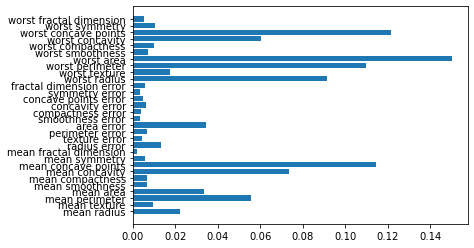

In [352]:
import numpy as np
# plt.barh(y=np.ararnge(forestModel.n_features_), 
plt.barh(y=f_names,
        width=forestModel.feature_importances_)

plt.show()